<AxesSubplot:>

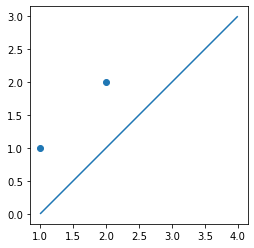

In [50]:
import geopandas as gpd

from shapely import ops as sops
from shapely.geometry import Point, LineString

line = LineString([[1, 0], [4, 3]])
point1 = Point([1, 1])
point2 = Point([2, 2])

points = [point1, point2]

df_line = gpd.GeoDataFrame([[1, line]], geometry=1).rename(columns={1:'geometry'})
df_points_in = gpd.GeoDataFrame([[1, point1], [2, point2]], geometry=1).rename(columns={1:'geometry'})

ax = df_line.plot()
df_points_in.plot(ax=ax)

In [51]:
# linear referencing to split lines
# https://shapely.readthedocs.io/en/stable/manual.html#linear-referencing-methods


def split_line_by_points(gdf_points, line_geom):
    
    splitter_points_loose = {}
    for i in range(len(gdf_points)):
        geo = gdf_points.geometry[i]
        lindist = line_geom.project(geo)
        snapcoord = line_geom.interpolate(lindist)
        splitter_points_loose[i] = snapcoord
        
    df_splits = gpd.GeoDataFrame.from_dict(splitter_points_loose, orient='index', geometry=0) \
                .rename(columns={0:'geometry'})
    
    splitter_geo = df_splits.geometry.unary_union
    seg_coll = sops.split(test_line, splitter_geo)
    
    segments = [seg for seg in seg_coll]
    
    gdf_segments = gpd.GeoDataFrame(
    list(range(len(segments))), geometry=segments)
    
    gdf_segments.columns = ['index', 'geometry']
    
    return gdf_segments

test_line = df_line.geometry[0]
gdf_segs = split_line_by_points(df_points_in, test_line)
gdf_segs

,index,geometry
0,0,"LINESTRING (1.00000 0.00000, 1.50000 0.50000)"
1,1,"LINESTRING (1.50000 0.50000, 2.50000 1.50000)"
2,2,"LINESTRING (2.50000 1.50000, 4.00000 3.00000)"
